# Cap 9 Plotagem e visualização

In [3]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


## 9.1 Introdução rápida à API do matplotlib

In [4]:
data = np.arange(10)


In [5]:
data


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

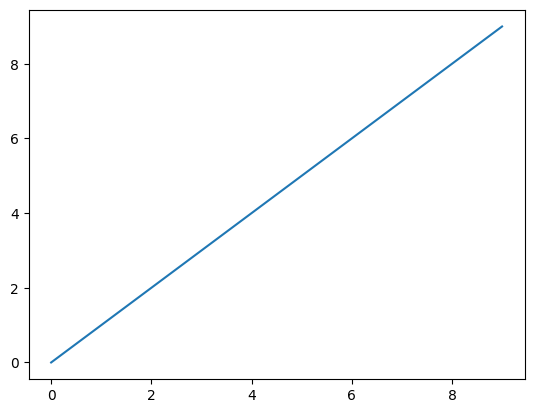

In [6]:
plt.plot(data)


### Figuras e subplotagens

In [7]:
fig = plt.figure()


<Figure size 640x480 with 0 Axes>

In [8]:
ax1 = fig.add_subplot(2, 2, 1)


In [9]:
ax2 = fig.add_subplot(2, 2, 2)


In [10]:
ax3 = fig.add_subplot(2, 2, 3)



<div style="border-left: 4px solid #50fa7b; background: #282a36; color: #f8f8f2; padding: 10px; margin: 10px 0; font-family: sans-serif;">
  <strong>💡 Dica:</strong>
  Uma particularidade do uso de Jupyter Notebooks é que as plotagens são redefinidas
  após cada célula ser avaliada, portanto, você deve inserir todos os comandos
  de plotagem em um única célula do notebook.
</div>

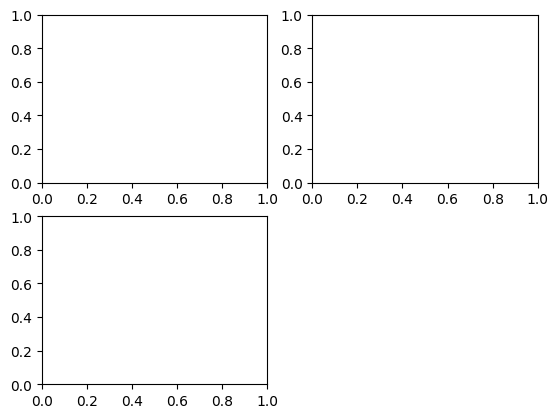

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)


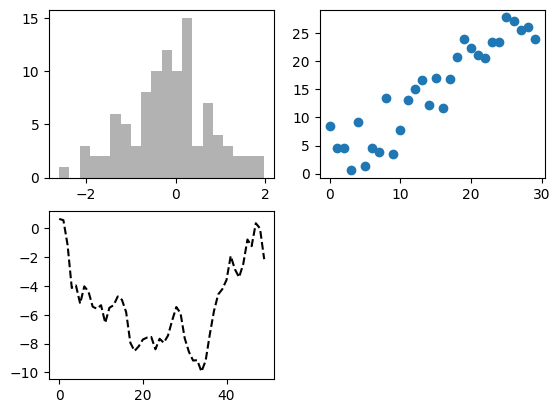

In [12]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30))
ax3.plot(
    np.random.standard_normal(50).cumsum(), color="black", linestyle="dashed"
);


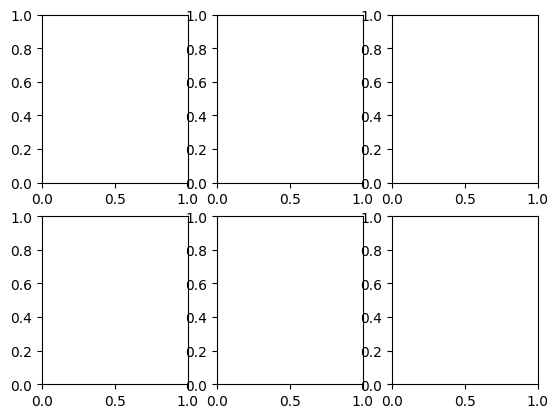

In [13]:
# Método subplots
fig, axes = plt.subplots(2, 3)


In [14]:
axes


array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

#### Ajuste do espaçamento ao redor das subplotagens

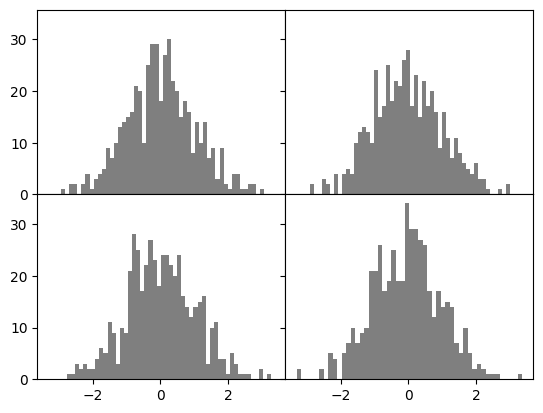

In [15]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(
            np.random.standard_normal(500), bins=50, color="black", alpha=0.5
        )
fig.subplots_adjust(wspace=0, hspace=0)


### Cores, marcadores e estilos de linha

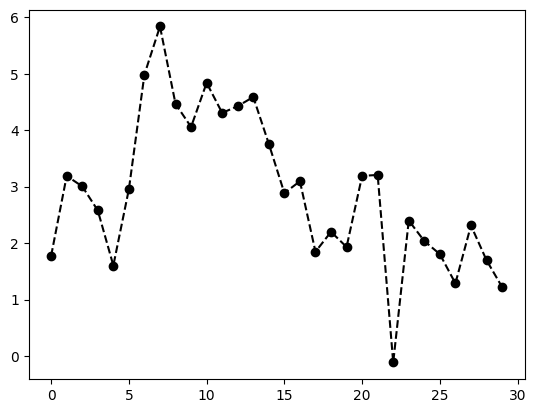

In [16]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(
    np.random.standard_normal(30).cumsum(),
    color="black",
    linestyle="dashed",
    marker="o",
);


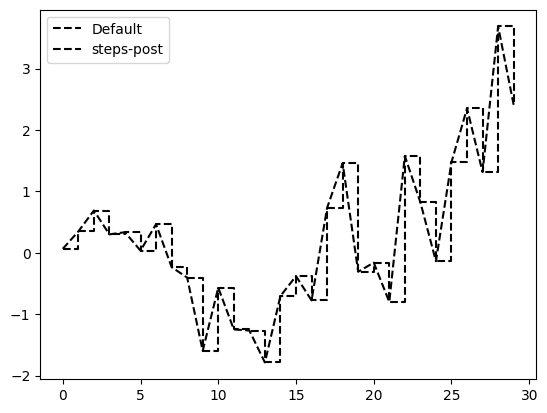

In [17]:
fig = plt.figure()
ax = fig.add_subplot()

data = np.random.standard_normal(30).cumsum()

ax.plot(data, color="black", linestyle="dashed", label="Default")
ax.plot(
    data,
    color="black",
    linestyle="dashed",
    drawstyle="steps-post",
    label="steps-post",
);
ax.legend();


<div style="border-left: 4px solid #8be9fd; background: #282a36; color: #f8f8f2; padding: 10px; margin: 10px 0; font-family: sans-serif;">
  <strong>📝 Nota:</strong>
  É preciso chamar <code style="background-color: #44475a; color: #f8f8f2; padding: 2px 4px; border-radius: 4px;">ax.legend</code> para criar a legenda, independentemene de você ter
  passado ou não as opções de <code style="background-color: #44475a; color: #f8f8f2; padding: 2px 4px; border-radius: 4px;">label</code> ao plotar os dados.
</div>

### Marcações, rótulos e legendas

#### Definição do título, dos rótulos dos eixos, das marcações e dos rótulos das marcações

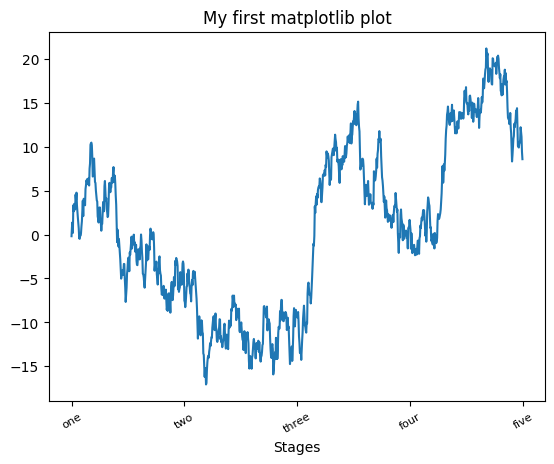

In [18]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum())

# Métodos set_xticks e set_xticklabels
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(
    ["one", "two", "three", "four", "five"], rotation=30, fontsize=8
)

# Métodos set_xlabel e set_title
ax.set_xlabel("Stages")
ax.set_title("My first matplotlib plot");

# Sintaxe alternativa
# ax.set(title="My first matplotlib plot", xlabel="Stages")


#### Inserção de legendas


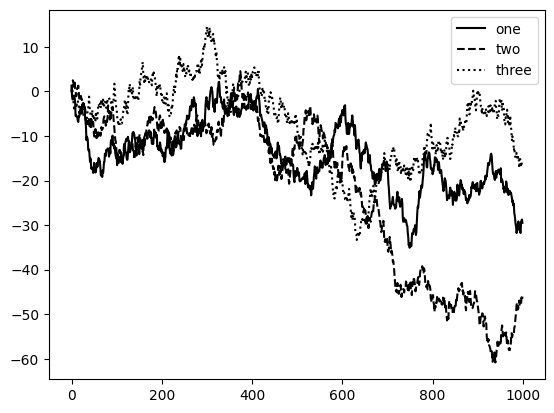

In [19]:
fig, ax = plt.subplots()

ax.plot(np.random.randn(1000).cumsum(), color="black", label="one")
ax.plot(
    np.random.randn(1000).cumsum(),
    color="black",
    linestyle="dashed",
    label="two",
)
ax.plot(
    np.random.randn(1000).cumsum(),
    color="black",
    linestyle="dotted",
    label="three",
)
ax.legend();


### Anotações e desenhos em um subplotagem

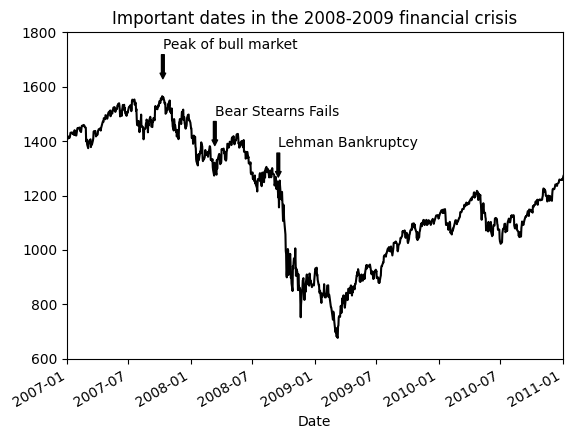

In [20]:
from datetime import datetime
import pandas as pd

fig, ax = plt.subplots()

data = pd.read_csv("examples/spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]

spx.plot(ax=ax, color="black")

crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy"),
]

for date, label in crisis_data:
    ax.annotate(
        label,
        xy=(date, spx.asof(date) + 75),
        xytext=(date, spx.asof(date) + 225),
        arrowprops=dict(facecolor="black", headwidth=4, width=2, headlength=4),
        horizontalalignment="left",
        verticalalignment="top",
    )

# Dá um zoom de 2007 a 2010
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])

ax.set_title("Important dates in the 2008-2009 financial crisis");


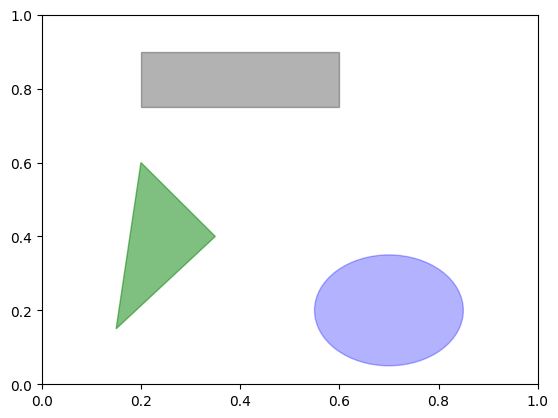

In [21]:
# Patches
fig, ax = plt.subplots()

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon(
    [[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color="green", alpha=0.5
)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon);


### Como salvar as plotagens em arquivo

Para salvar a figura ativa em arquivo utiliza-se o método de instância <code style="background-color: #44475a; color: #f8f8f2; padding: 2px 4px; border-radius: 4px;">savefig</code>.
```python
fig.savefig("figpath.svg")
```
Um parâmetro importante dessa função é o <code style="background-color: #44475a; color: #f8f8f2; padding: 2px 4px; border-radius: 4px;">dpi</code>, que controla a resolução em pontos por polegada.
```python
fig.savefig("figpath.png", dpi=400)
```

### Configuração do matplotlib

Uma maneira de modificar a configuração programaticamente usando Python é usando
o método <code style="background-color: #44475a; color: #f8f8f2; padding: 2px 4px; border-radius: 4px;">rc</code>;
Por exemplo, para configurar o tamanho padrão da figura globalmente para que seja
10 x 10, pode-se usar o seguinte:
```python
plt.rc("figure", figsize=(10, 10))
```

## 9.2 Plotagem com o pandas e o seaborn

### Plotagens de linha

In [22]:
s = pd.Series(
    np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10)
)


<Axes: >

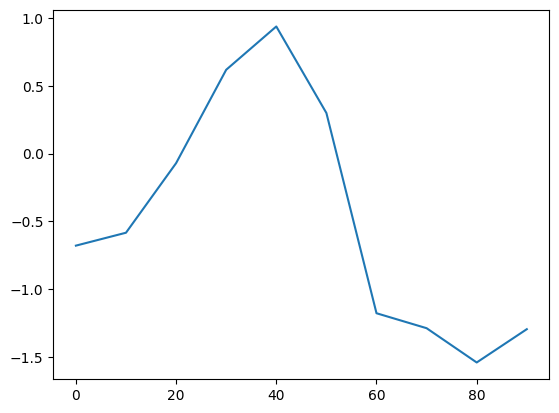

In [23]:
s.plot()


In [24]:
df = pd.DataFrame(
    np.random.standard_normal((10, 4)).cumsum(0),
    columns=["A", "B", "C", "D"],
    index=np.arange(0, 100, 10),
)


In [25]:
plt.style.use("grayscale")


<Axes: >

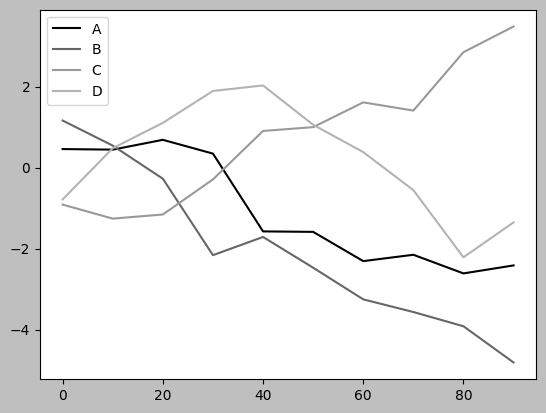

In [26]:
df.plot()


### Plotagens de barras

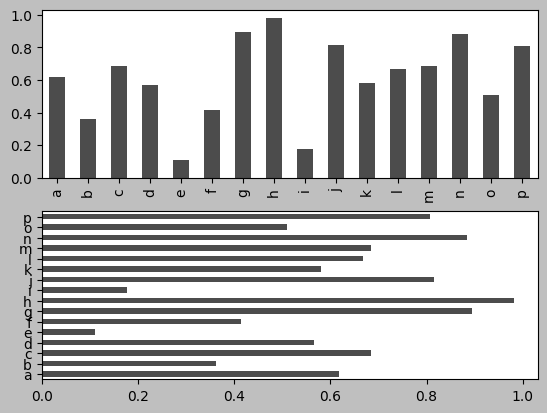

In [27]:
fig, axes = plt.subplots(2, 1)

data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))

data.plot.bar(ax=axes[0], color="black", alpha=0.7)
data.plot.barh(ax=axes[1], color="black", alpha=0.7);



In [28]:
df = pd.DataFrame(
    np.random.uniform(size=(6, 4)),
    index=["one", "two", "three", "four", "five", "six"],
    columns=pd.Index(["A", "B", "C", "D"], name="Genus"),
)


In [29]:
df


Genus,A,B,C,D
one,0.317828,0.653095,0.462648,0.093785
two,0.473114,0.819970,0.598150,0.544960
three,0.205154,0.737908,0.293251,0.642495
four,0.412455,0.999743,0.371973,0.597434
five,0.672207,0.669963,0.729318,0.311037
six,0.891150,0.761671,0.628441,0.012643


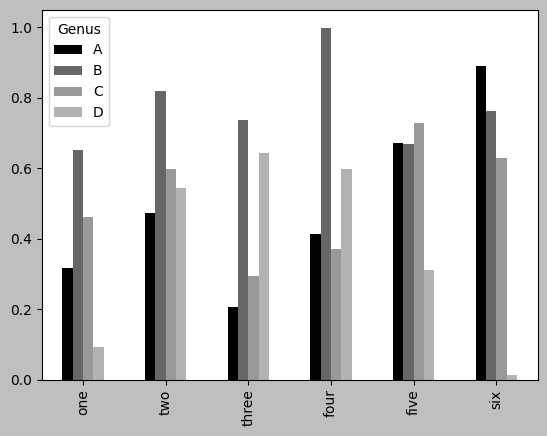

In [30]:
df.plot.bar();


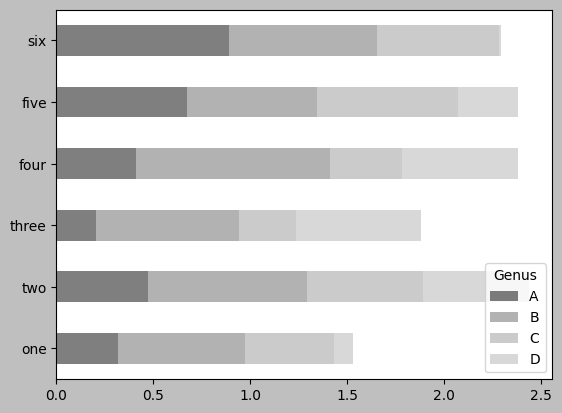

In [32]:
df.plot.barh(stacked=True, alpha=0.5);


In [ ]:
tips = pd.read_csv("examples/tips.csv")


In [ ]:
tips.head()


,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [35]:
party_counts = pd.crosstab(tips["day"], tips["size"])


In [37]:
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])


In [ ]:
party_counts


size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [45]:
party_counts = party_counts.loc[:, 2:5]


In [46]:
party_counts


size,2,3,4,5
day,,,,
Thur,48,4,5,1
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3


In [47]:
# Normalizar para que a soma seja 1
party_pcts = party_counts.div(party_counts.sum(axis="columns"), axis="index")


In [ ]:
party_pcts


size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


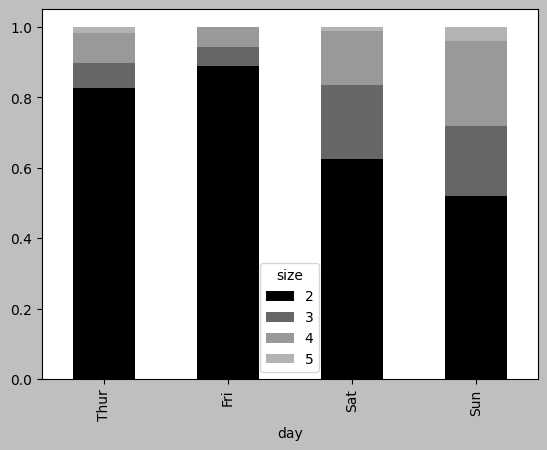

In [50]:
party_pcts.plot.bar(stacked=True);


In [52]:
import seaborn as sns


In [53]:
tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])


In [ ]:
tips.head()


,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


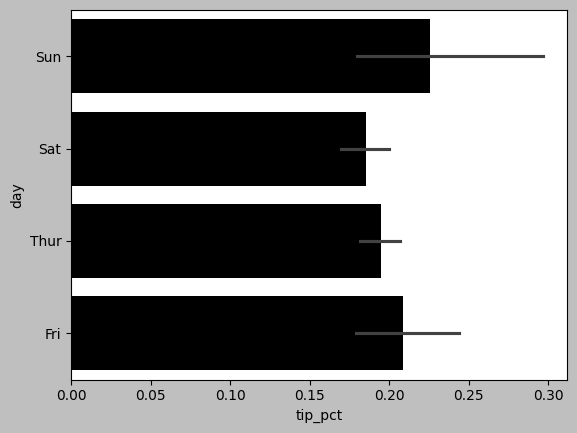

In [56]:
sns.barplot(x="tip_pct", y="day", data=tips, orient="h");


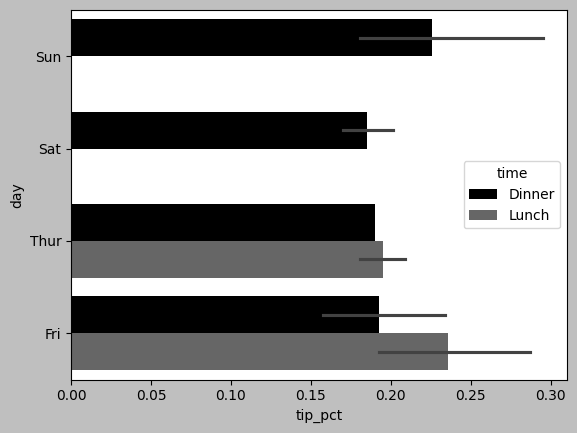

In [58]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h");


Pode alterna-se entre plotagens com diferentes aparências usando <code style="background-color: #44475a; color: #f8f8f2; padding: 2px 4px; border-radius: 4px;">seaborn.set_style</code>:

In [59]:
sns.set_style("whitegrid")


Na produção de plotagens para mídias impressas em preto e branco, pode ser útil
definir uma paleta de cores em escala de cinza, desta forma:
```python
sns.set_palette("Greys_r")
```

### Histograma e plotagens de densidade

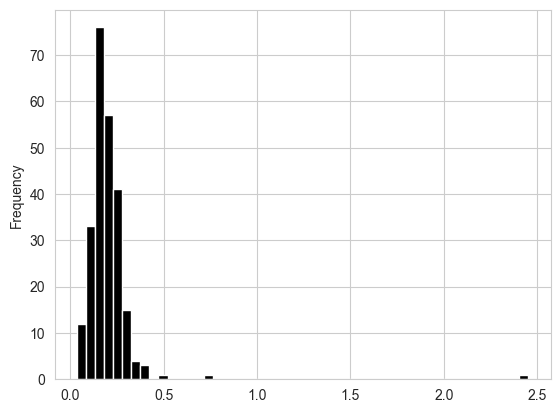

In [61]:
tips["tip_pct"].plot.hist(bins=50);


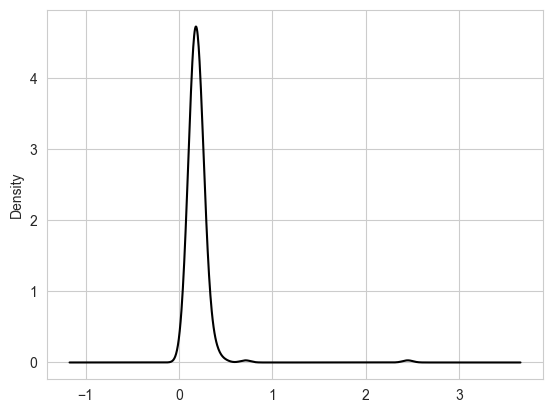

In [63]:
tips["tip_pct"].plot.density();


In [ ]:
comp1 = np.random.standard_normal(200)


In [66]:
comp2 = 10 + 2 * np.random.standard_normal(200)


In [67]:
values = pd.Series(np.concatenate([comp1, comp2]))


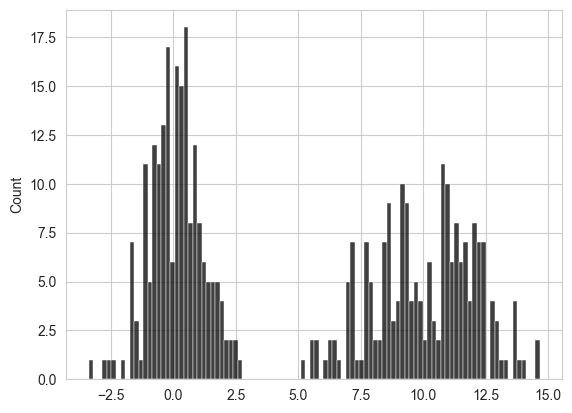

In [69]:
sns.histplot(values, bins=100, color="black");


### Plotagens de dispersão ou de pontos

In [70]:
macro = pd.read_csv("examples/macrodata.csv")


In [71]:
data = macro[["cpi", "m1", "tbilrate", "unemp"]]


In [72]:
trans_data = np.log(data).diff().dropna()


In [ ]:
trans_data.tail()


,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


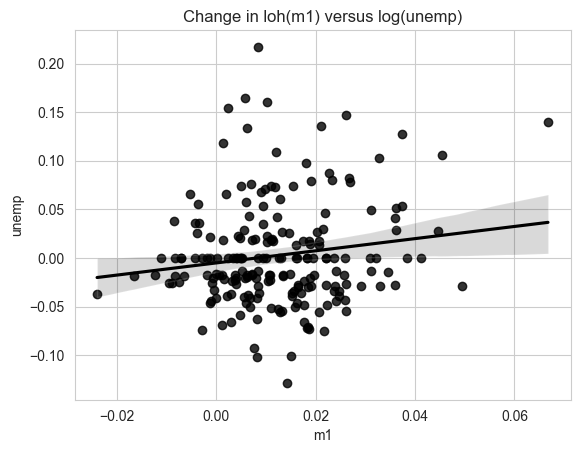

In [78]:
ax = sns.regplot(x="m1", y="unemp", data=trans_data)
ax.set_title("Change in loh(m1) versus log(unemp)");


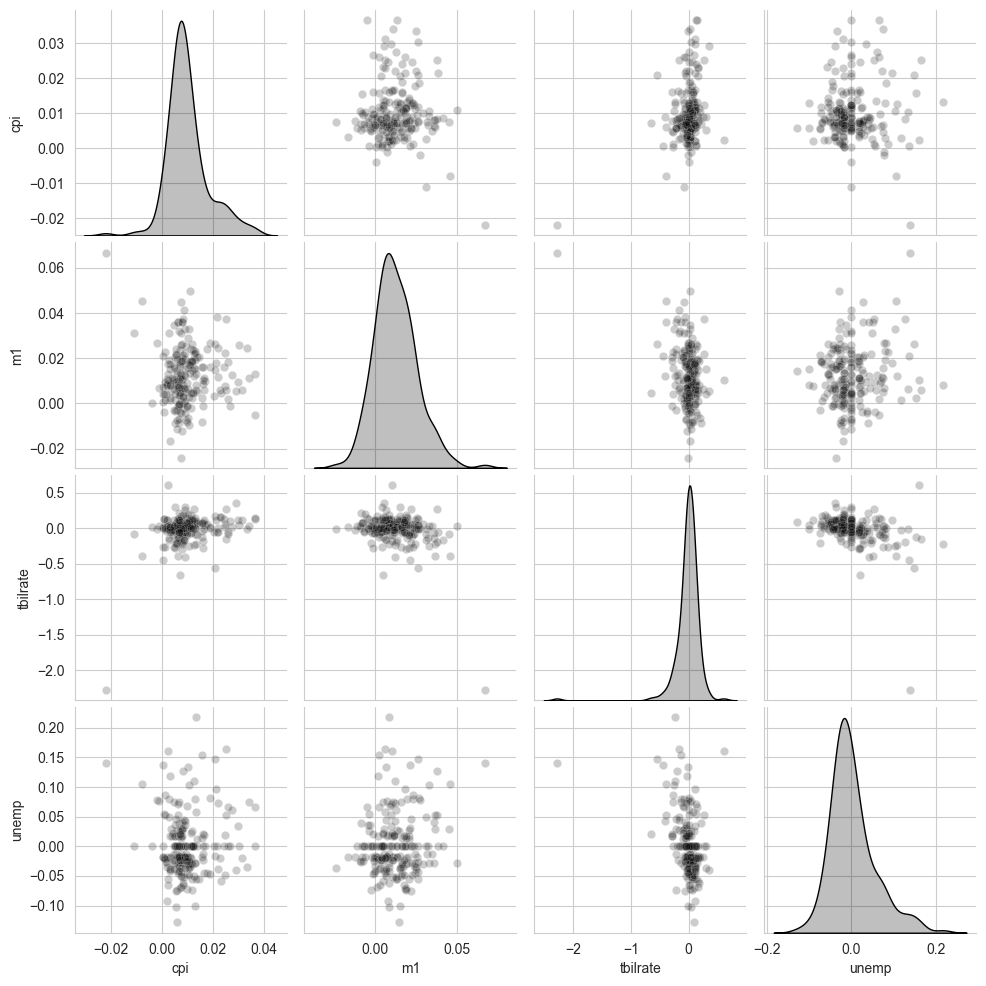

In [80]:
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha": 0.2});


### Grades de faceta e dados categóricos

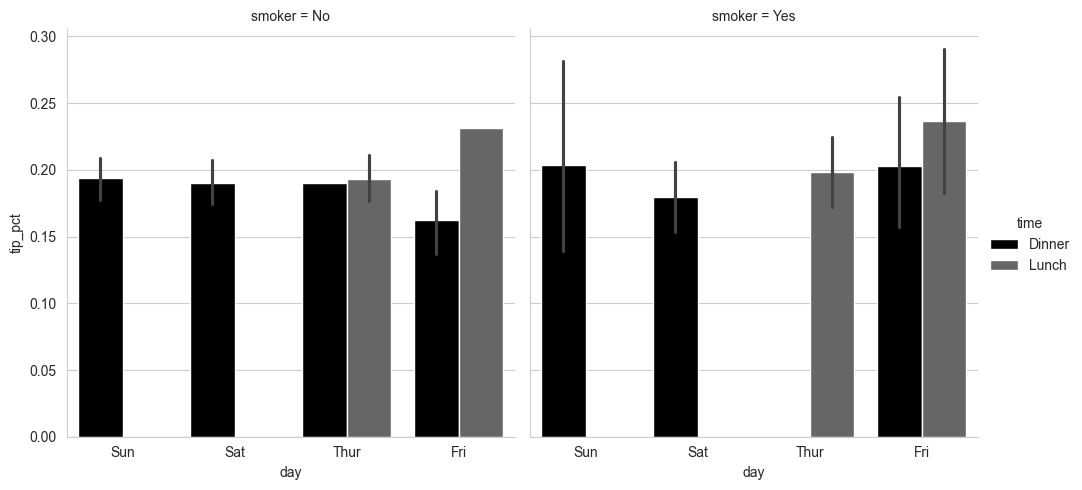

In [ ]:
sns.catplot(
    x="day",
    y="tip_pct",
    hue="time",
    col="smoker",
    kind="bar",
    data=tips[tips.tip_pct < 1],
);


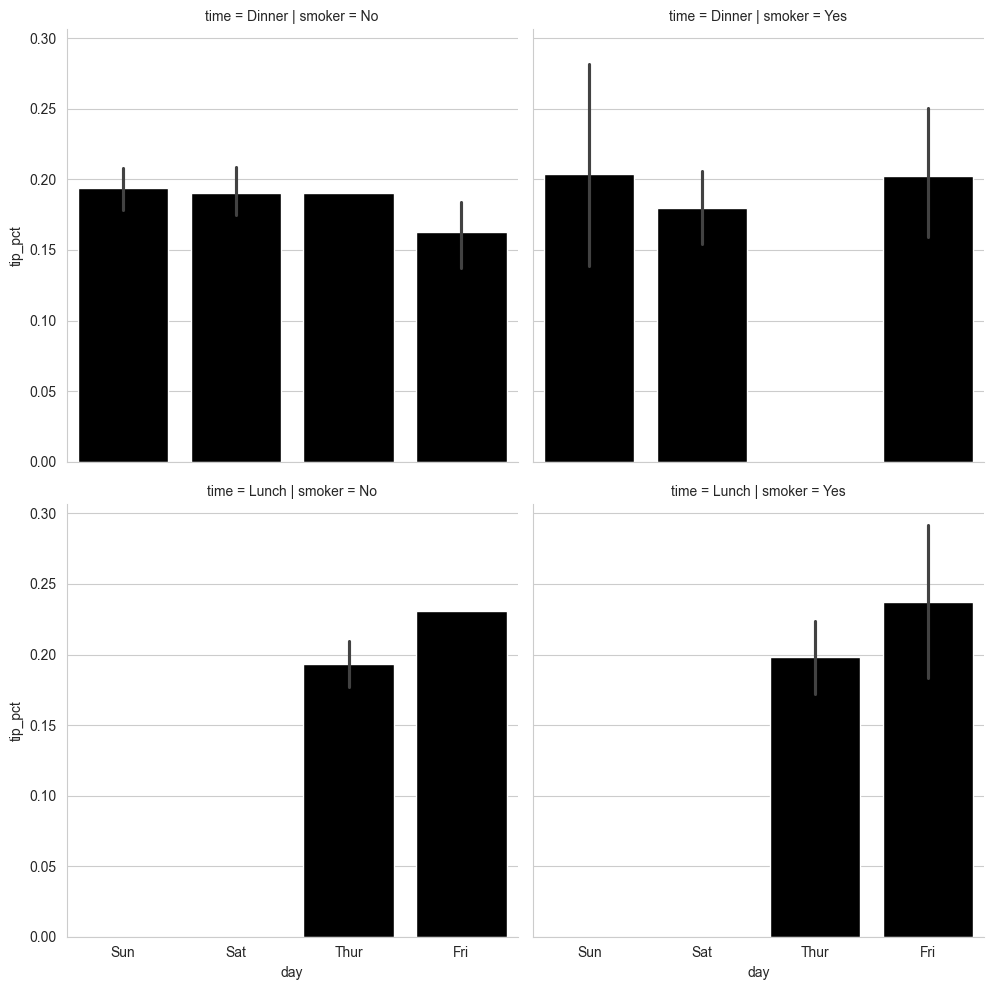

In [82]:
sns.catplot(
    x="day",
    y="tip_pct",
    row="time",
    col="smoker",
    kind="bar",
    data=tips[tips.tip_pct < 1],
);


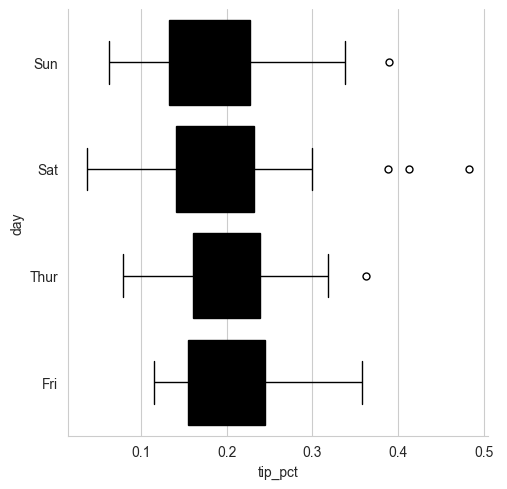

In [84]:
sns.catplot(x="tip_pct", y="day", kind="box", data=tips[tips.tip_pct < 0.5]);
